TASK 2
Name : Rutuja Bhondave
Domain : Data Science
Branch :  Automaion And Robotics

In [2]:
#imported all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#import warnings
import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv('IMDb Movies India.csv',encoding='ISO-8859-1')
df.dropna(inplace=True)
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [13]:
df.shape

(5659, 10)

In [14]:
df.describe()

,Rating
count,5659.000000
mean,5.898533
std,1.381165
min,1.100000
25%,5.000000
50%,6.100000
75%,6.900000
max,10.000000


In [15]:
df.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [16]:
df['Year'] = df['Year'].str.strip('()').astype(int)

In [17]:
df['Votes'] = df['Votes'].astype(str)
df['Votes'] = df['Votes'].str.replace(',','').astype(int)

In [18]:
df['Duration'] = df['Duration'].str.replace('min','').astype(int)
df['Duration'].fillna(df['Duration'].mean(),inplace=True)

In [19]:
df.describe()

,Year,Duration,Rating,Votes
count,5659.000000,5659.000000,5659.000000,5659.000000
mean,1996.247570,133.439124,5.898533,2697.649585
std,19.741839,25.319939,1.381165,13651.503584
min,1931.000000,21.000000,1.100000,5.000000
25%,1983.000000,119.000000,5.000000,30.000000
50%,2002.000000,135.000000,6.100000,131.000000
75%,2013.000000,150.000000,6.900000,922.500000
max,2021.000000,321.000000,10.000000,591417.000000


<Axes: xlabel='Year', ylabel='Count'>

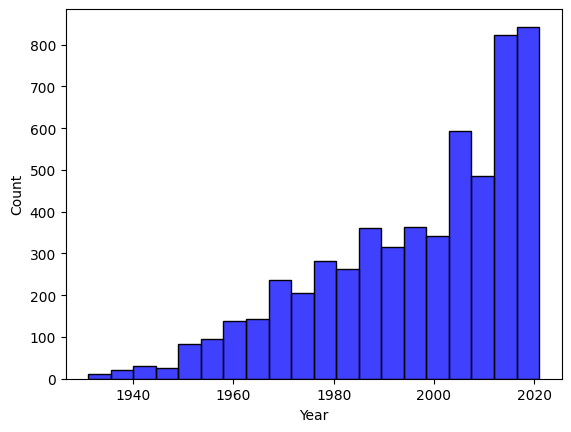

In [20]:
sns.histplot(df['Year'],bins = 20,kde = False,color='blue')

<Axes: xlabel='Duration', ylabel='Count'>

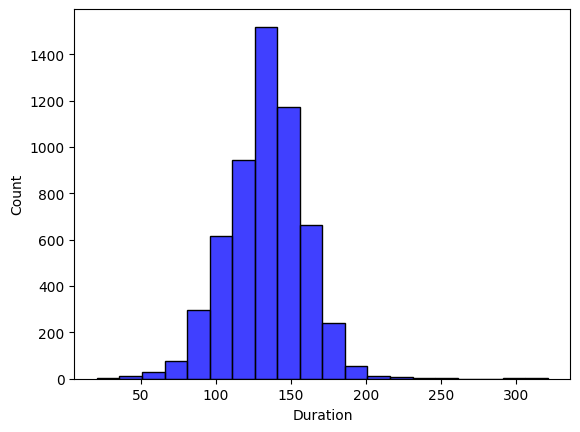

In [21]:
sns.histplot(df['Duration'],bins = 20,kde = False,color='blue')

<Axes: xlabel='Rating', ylabel='Count'>

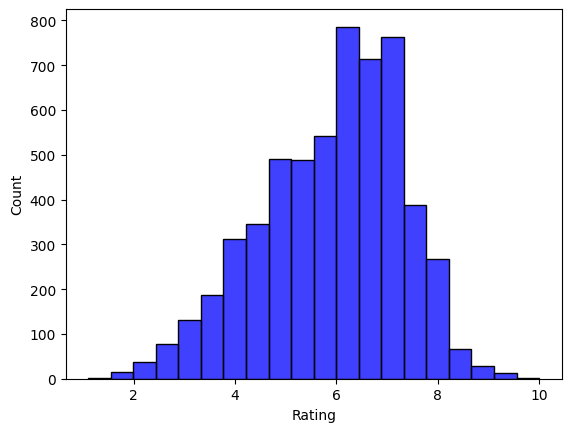

In [22]:
sns.histplot(df['Rating'],bins = 20,kde = False,color='blue')

<Axes: xlabel='Votes', ylabel='Count'>

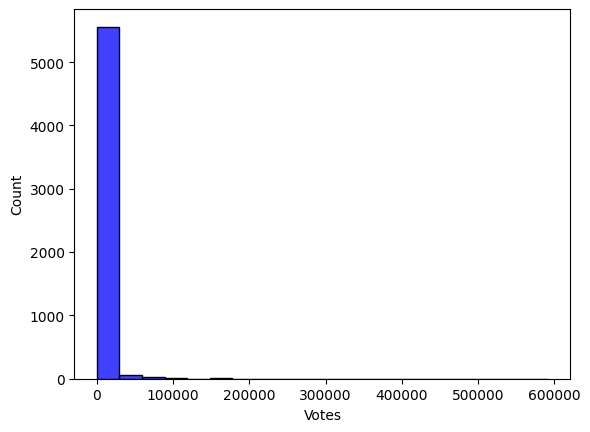

In [23]:
sns.histplot(df['Votes'],bins = 20,kde = False,color='blue')

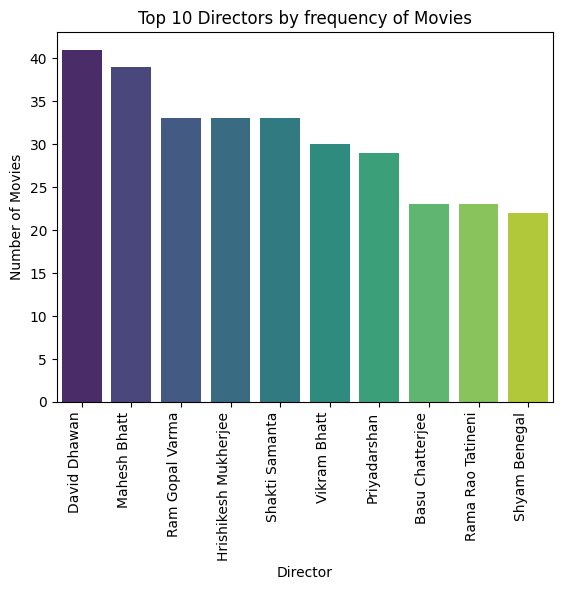

In [28]:
Director_counts = df['Director'].value_counts().head(10)
sns.barplot(x=Director_counts.index, y=Director_counts.values,hue=Director_counts.index,palette='viridis')
plt.title('Top 10 Directors by frequency of Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation = 90,ha='right')
plt.show()

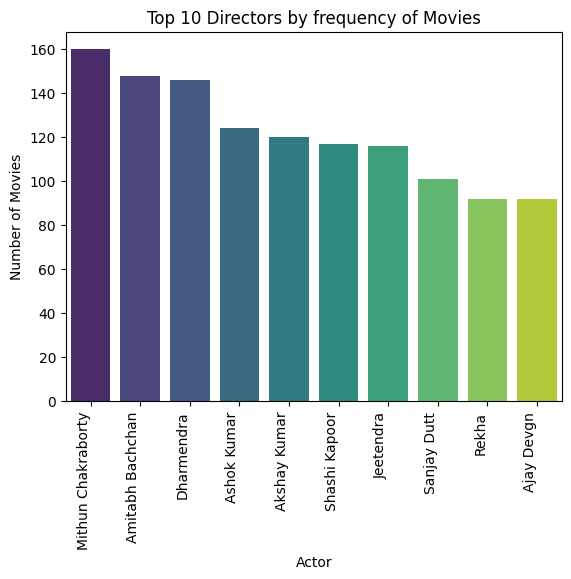

In [31]:
Actor = pd.concat([df['Actor 1'],df['Actor 2'], df['Actor 3']])
Actor_counts = Actor.value_counts().head(10)
sns.barplot(x=Actor_counts.index, y=Actor_counts.values,hue=Actor_counts.index,palette='viridis')
plt.title('Top 10 Directors by frequency of Movies')
plt.xlabel('Actor')
plt.ylabel('Number of Movies')
plt.xticks(rotation = 90,ha='right')
plt.show()

In [32]:
df.drop(['Name','Genre', 'Director','Actor 1','Actor 2','Actor 3'], axis=1,inplace=True)
df.head()

,Year,Duration,Rating,Votes
1,2019,109,7.0,8
3,2019,110,4.4,35
5,1997,147,4.7,827
6,2005,142,7.4,1086
8,2012,82,5.6,326


In [33]:
X = df[['Year','Duration','Votes']]
Y = df['Rating']

In [36]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [37]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [38]:
model.fit(X_train,Y_train)

LinearRegression()

In [41]:
Y_pred = model.predict(X_test)

In [43]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(Y_test,Y_pred)
mse = mean_squared_error(Y_test,Y_pred)
r2 = r2_score(Y_test,Y_pred)
print("Mean Absolute Error :" ,mae)
print("Mean Squared Error :" ,mse)
print("R Squared :" ,r2)

Mean Absolute Error : 1.0606062213129308
Mean Squared Error : 1.7073310281488039
R Squared : 0.07798737059748773


In [48]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train, Y_train)
Y_pred_gb = gb_reg.predict(X_test)

mae_gb = mean_absolute_error(Y_test, Y_pred_gb)
mse_gb = mean_squared_error(Y_test, Y_pred_gb)
r2_gb = r2_score(Y_test, Y_pred_gb)

print("Gradient Boosting Mean Absolute Error:", mae_gb)
print("Gradient Boosting Mean Squared Error:", mse_gb)
print("Gradient Boosting R Squared:", r2_gb)


Gradient Boosting Mean Absolute Error: 0.8637151736623915
Gradient Boosting Mean Squared Error: 1.2914237382982199
Gradient Boosting R Squared: 0.302590430918247


In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Rf_reg = RandomForestRegressor()
Rf_reg.fit(X_train, Y_train)
Rf_pred_reg = Rf_reg.predict(X_test)

mae_reg = mean_absolute_error(Y_test, Rf_pred_reg)
mse_reg = mean_squared_error(Y_test, Rf_pred_reg)
r2_reg = r2_score(Y_test, Rf_pred_reg)

print("Random Forest Regression Mean Absolute Error:", mae_reg)
print("Random Forest Regression Mean Squared Error:", mse_reg)
print("Random Forest Regression R Squared:", r2_reg)


Random Forest Regression Mean Absolute Error: 0.9227089685344102
Random Forest Regression Mean Squared Error: 1.510648869434476
Random Forest Regression R Squared: 0.18420194253634814
